# <center><font color='red'>  Compte Rendue Segmentation </font></center>

# Bruit d'une image

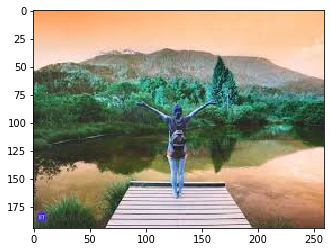

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 40 )

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('nature40.jpg', quant)
plt.imshow(image)

cv2.imread('nature.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

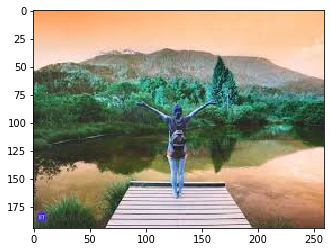

In [2]:
plt.imshow(image)

In [3]:
!pip install opencv-python


In [15]:
!apt install libgl1-mesa-glx

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


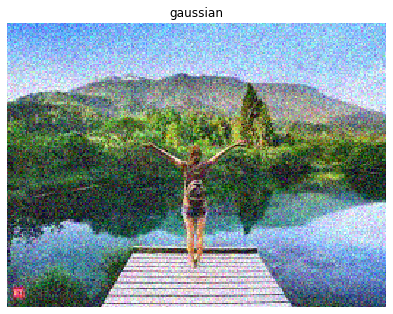

In [4]:
import skimage.io
import matplotlib.pyplot as plt
from scipy import ndimage

img_path="nature.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))



r=4
c=2
plotnoise(img, "gaussian", r,c,1)
#plotnoise(img, "localvar", r,c,2)
#plotnoise(img, "poisson", r,c,3)
#plotnoise(img, "salt", r,c,4)
#plotnoise(img, "pepper", r,c,5)
#plotnoise(img, "s&p", r,c,6)
#plotnoise(img, "speckle", r,c,7)
#plotnoise(img, None, r,c,8)
plt.show()


# <font color='Blue'> Interact</font>

In [6]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


 

def plotnoise(mode):
    img_path="nature.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt"]);

 

plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt'), value=…

In [13]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

def segm(k):
    image = cv2.imread('nature.jpg')
    (h1, w1) = image.shape[:2]

 

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

 

    image = image.reshape((image.shape[0] * image.shape[1], 3))

 


    clt = KMeans(n_clusters = k)

 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

 

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

 

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

 

    plt.figure(figsize=(10,11))
    cv2.imwrite('imagess2.jpg', quant)
    return plt.imshow(image)
plt.show()

In [14]:
interact(segm,k=widgets.IntSlider(min=2, max=4, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=4, min=2), Output()), _dom_classes=('widget-inte…

# Débruitage d'une image

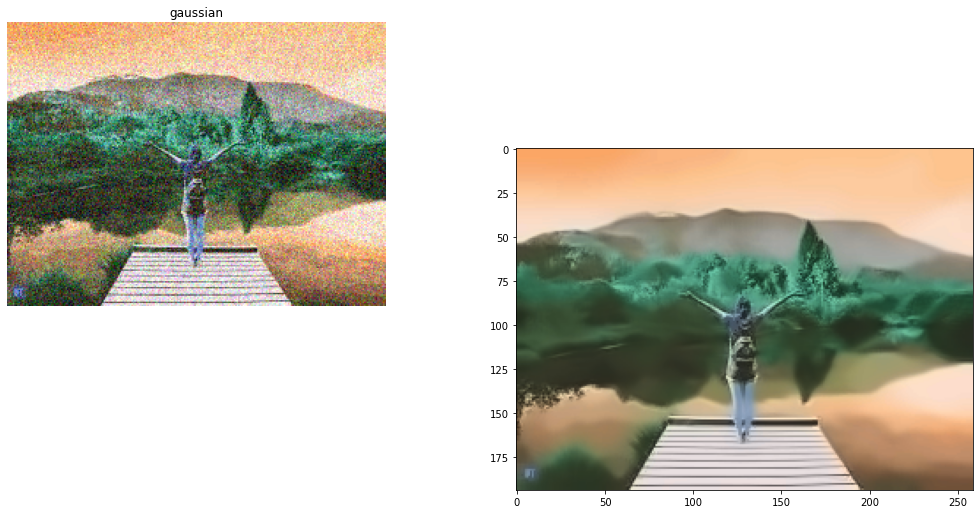

In [48]:
import skimage.io
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2 


img_path="nature40.jpg"
img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
    
r=4
c=2
plotnoise(img, "gaussian", r,c,1)

# denoising of image saving it into dst image 
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15) 


plt.subplot(222), plt.imshow(dst) 
plt.show()
